# **evolution** of **first name** popularity

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline
import seaborn as sns

## download the dataset

In [2]:
!curl https://wagon-public-datasets.s3.amazonaws.com/02-Data-Toolkit/03-Data-Visualization/5_OneCatSevNumOrdered.csv > 5_OneCatSevNumOrdered.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45271  100 45271    0     0  78151      0 --:--:-- --:--:-- --:--:-- 78188


In [3]:
file = '5_OneCatSevNumOrdered.csv'

## Creating the data frame in padas

In [4]:
df = pd.read_csv(file)
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    1161 non-null   int64  
 1   sex     1161 non-null   object 
 2   name    1161 non-null   object 
 3   n       1161 non-null   int64  
 4   prop    1161 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 45.5+ KB


None

,year,sex,name,n,prop
0,1880,F,Helen,636,0.006516
1,1880,F,Amanda,241,0.002469
2,1880,F,Betty,117,0.001199
3,1880,F,Dorothy,112,0.001147
4,1880,F,Linda,27,0.000277


## Simple bar plot
Create a simple bar plot of the frequency of each name overall.
(matplotlib)

In [5]:
df['name'].unique()

array(['Helen', 'Amanda', 'Betty', 'Dorothy', 'Linda', 'Deborah',
       'Jessica', 'Patricia', 'Ashley'], dtype=object)

<AxesSubplot:xlabel='name'>

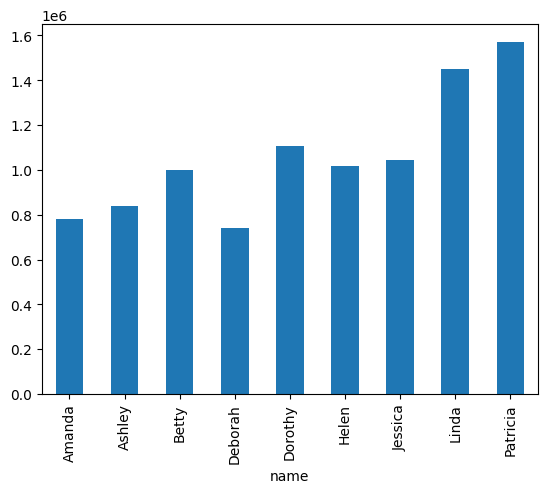

In [6]:
df.groupby(['name']).sum()['n'].plot(kind="bar")

## Grouped bar plot


Now let’s re-create this plot from the article using seaborn.
Make sure you are using a similar color palette, the same years and names.
<br>
https://www.data-to-viz.com/graph/barplot.html

In [7]:
# 1920, 1960, 2000
y1920 = df['year'] == 1920
# display(y1920)
y1960 = df['year'] == 1960
# display(y1960)
y2000 = df['year'] == 2000
# display(y2000)
y_selection = (y1920 | y1960 | y2000)
# display(y_selection.iloc[1021:1025:])

name1 = df['name'] == 'Ashley'
# display(name1)
name2 = df['name'] == 'Betty'
# display(name2)
name3 = df['name'] == 'Helen'
# display(name3)
name4 = df['name'] == 'Patricia'
# display(name4)
name_selection = (name1 | name2 | name3 | name4)
# display(name_selection)

selection = (y_selection & name_selection)
# display(selection)
df_extract = df[selection]
# display(df_extract)
df_extract = df_extract.sort_values('name', ascending=True)
display(df_extract)

,year,sex,name,n,prop
665,1960,F,Ashley,57,0.000027
1017,2000,F,Ashley,17997,0.009023
319,1920,F,Betty,14017,0.011267
660,1960,F,Betty,6503,0.003127
1025,2000,F,Betty,174,0.000087
318,1920,F,Helen,35098,0.028213
662,1960,F,Helen,4069,0.001956
1021,2000,F,Helen,890,0.000446
320,1920,F,Patricia,2502,0.002011
658,1960,F,Patricia,32107,0.015437


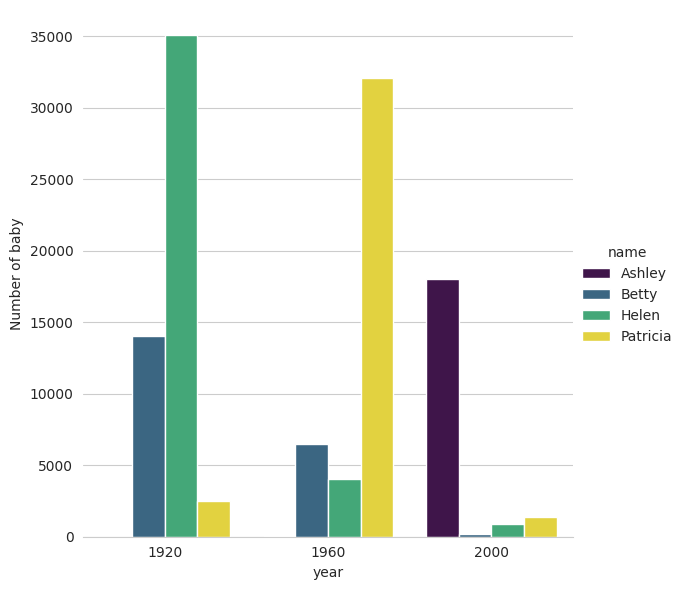

In [8]:
colors = ['#440c53','#2f688e','#34b779','#fde825']

sns.set_style('whitegrid')

g = sns.catplot(x="year", y="n", hue="name", data=df_extract,
                height=6, kind="bar", 
                palette=sns.color_palette(colors))

g.despine(left=True)
g.set_ylabels("Number of baby")